In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
print(data.shape)
print(target.shape)

(285, 2500)
(285,)


In [3]:
import collections
print(collections.Counter(target))

Counter({np.int32(1): 113, np.int32(2): 91, np.int32(0): 81})


In [4]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf')

model = make_pipeline(pca, svc)

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [6]:
model.fit(train_data, train_target)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [7]:
predicted_target = model.predict(test_data)

In [8]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_target, predicted_target)
print(acc)

1.0


In [9]:
from sklearn.metrics import classification_report

print(classification_report(test_target, predicted_target, target_names=['Barack Obama', 'Donald Trump', 'George W Bush']))

               precision    recall  f1-score   support

 Barack Obama       1.00      1.00      1.00         8
 Donald Trump       1.00      1.00      1.00        11
George W Bush       1.00      1.00      1.00        10

     accuracy                           1.00        29
    macro avg       1.00      1.00      1.00        29
 weighted avg       1.00      1.00      1.00        29



In [10]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_target, predicted_target)
print(matrix)

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 10]]


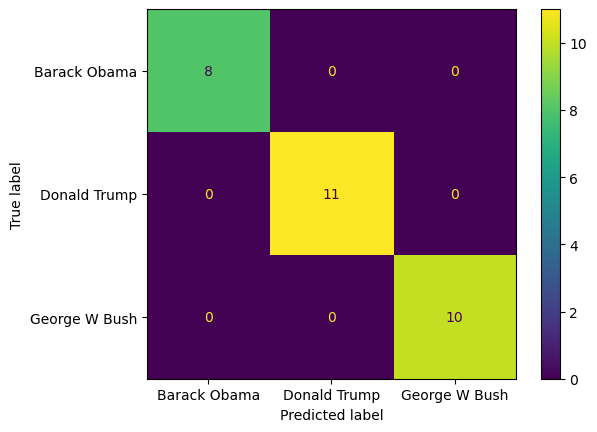

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Barack Obama', 'Donald Trump', 'George W Bush'])
disp.plot()

In [13]:
import joblib

joblib.dump(model, 'SVM-FaceRecognition.sav')

['SVM-FaceRecognition.sav']